# 1. Цель лабораторной работы: 
изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

# 2. Задание:
1. Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:        
   i. масштабирование признаков (не менее чем тремя способами);     
   ii.обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);      
   iii.обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);        
   iv. отбор признаков:
      + один метод из группы методов фильтрации (filter methods);
      + один метод из группы методов обертывания (wrapper methods);
      + один метод из группы методов вложений (embedded methods).

# 3. Ход выполнения работы

Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [2]:
dataset_1=pd.read_csv('winequality-red.csv')
dataset_1.info()
dataset_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3.1 Масштабирование признаков  
Методом **Z-оценки**:

In [3]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=dataset_1.columns)
    return res

In [4]:
cs1 = StandardScaler()
data_cs1_scaled_temp = cs1.fit_transform(dataset_1)
data_cs1_scaled =  arr_to_df(data_cs1_scaled_temp)
data_cs1_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [5]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

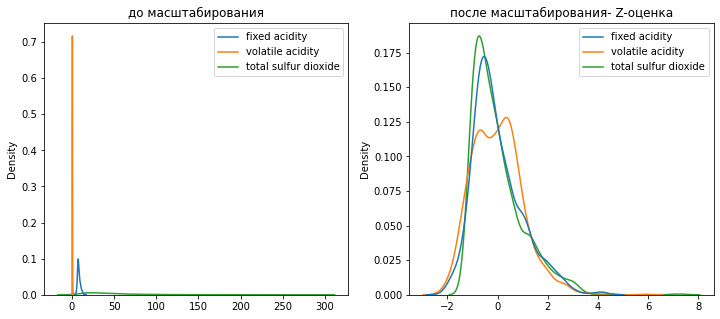

In [6]:
draw_kde(['fixed acidity', 'volatile acidity', 'total sulfur dioxide'], dataset_1, data_cs1_scaled, 'до масштабирования', 'после масштабирования- Z-оценка')

Методом **MinMaxScaler**:

In [7]:
cs2=MinMaxScaler()
data_cs2_scaled_temp=cs2.fit_transform(dataset_1)
data_cs2_scaled=arr_to_df(data_cs2_scaled_temp)
data_cs2_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


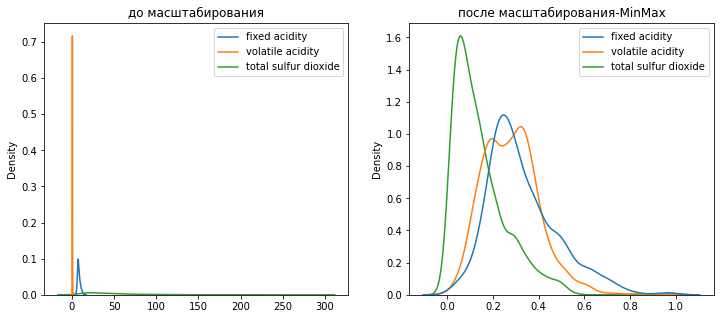

In [8]:
draw_kde(['fixed acidity', 'volatile acidity', 'total sulfur dioxide'], dataset_1, data_cs2_scaled, 'до масштабирования', 'после масштабирования-MinMax')

Методом **RobustScaler**:

In [9]:
cs3=RobustScaler()
data_cs3_scaled_temp=cs3.fit_transform(dataset_1)
data_cs3_scaled=arr_to_df(data_cs3_scaled_temp)
data_cs3_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.199827,0.031282,0.033259,0.484008,0.423327,0.133923,0.211695,-0.001486,0.005859,0.211938,0.139364,-0.363977
std,0.829093,0.716239,0.590306,2.014183,2.353265,0.747154,0.822383,0.844445,0.812560,0.941705,0.666042,0.807569
min,-1.571429,-1.600000,-0.787879,-1.857143,-3.350000,-0.928571,-0.800000,-2.988814,-3.000000,-1.611111,-1.125000,-3.000000
25%,-0.380952,-0.520000,-0.515152,-0.428571,-0.450000,-0.500000,-0.400000,-0.514541,-0.526316,-0.388889,-0.437500,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.619048,0.480000,0.484848,0.571429,0.550000,0.500000,0.600000,0.485459,0.473684,0.611111,0.562500,0.000000
max,3.809524,4.240000,2.242424,19.000000,26.600000,4.142857,6.275000,3.105145,3.684211,7.666667,2.937500,2.000000


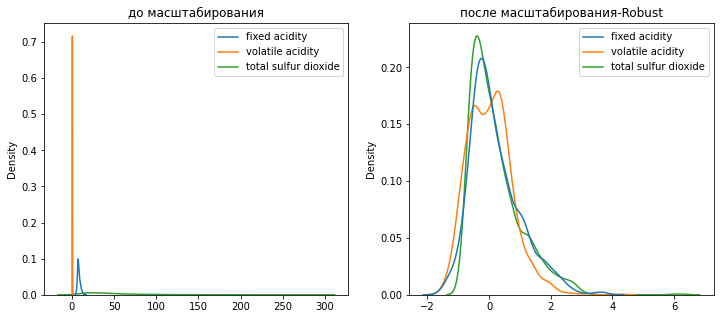

In [10]:
draw_kde(['fixed acidity', 'volatile acidity', 'total sulfur dioxide'], dataset_1, data_cs3_scaled, 'до масштабирования', 'после масштабирования-Robust')

## 3.2 Обработка выбросов для числовых признаков

**Удаление выборсов**

In [11]:
import scipy.stats as stats

In [12]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

Посмотреть исходное изображение

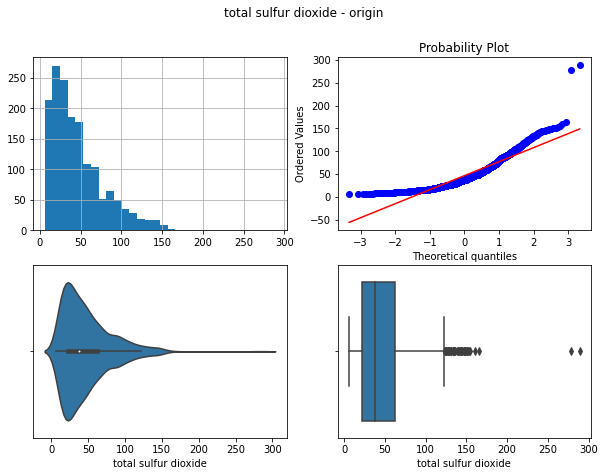

In [13]:
diagnostic_plots(dataset_1,'total sulfur dioxide','total sulfur dioxide - origin')

In [14]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [15]:
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary  

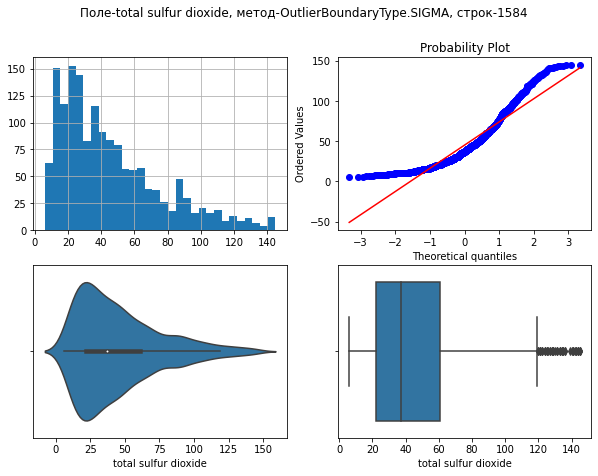

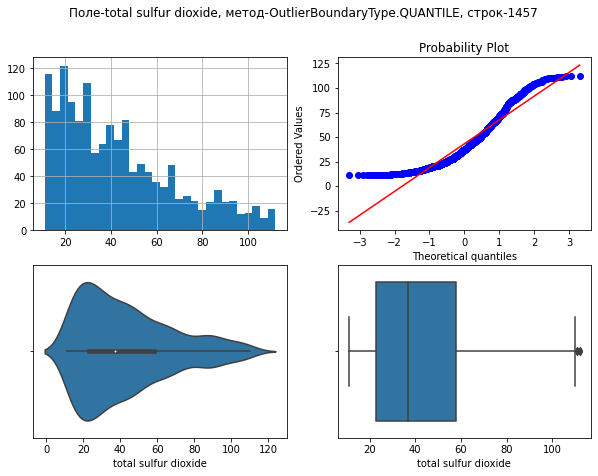

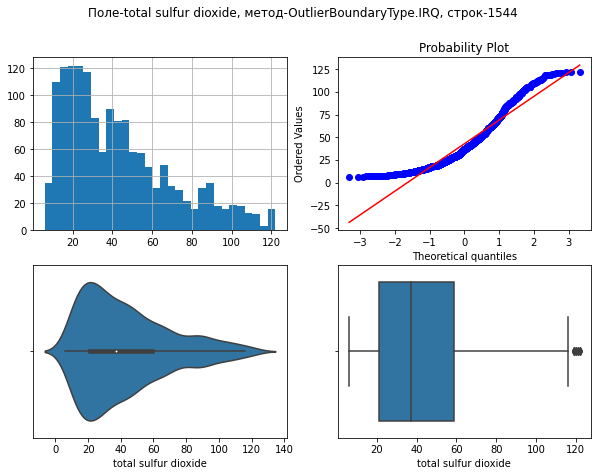

In [16]:
for obt in OutlierBoundaryType:
    lower_boundary, upper_boundary = get_outlier_boundaries(dataset_1, 'total sulfur dioxide', obt)
        # Флаги для удаления выбросов
    outliers_temp = np.where(dataset_1['total sulfur dioxide'] > upper_boundary, True, 
                np.where(dataset_1['total sulfur dioxide'] < lower_boundary, True, False))
        # Удаление данных на основе флага
    data_trimmed = dataset_1.loc[~(outliers_temp), ]  
    title = 'Поле-{}, метод-{}, строк-{}'.format('total sulfur dioxide', obt, data_trimmed.shape[0])
    diagnostic_plots(data_trimmed, 'total sulfur dioxide', title)

**Замена выбросов**

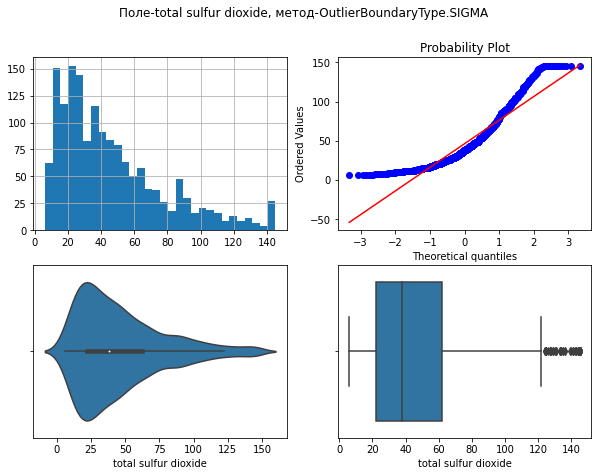

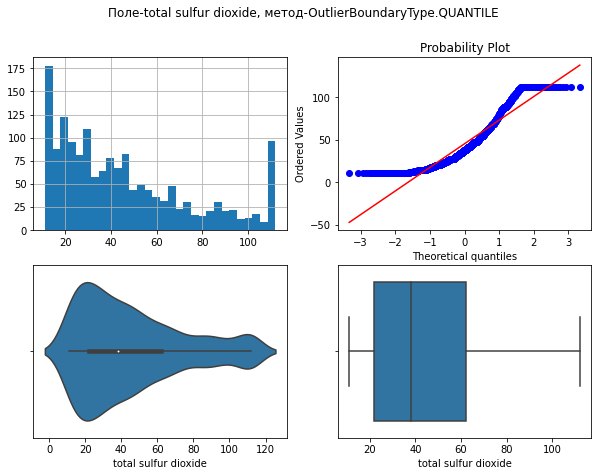

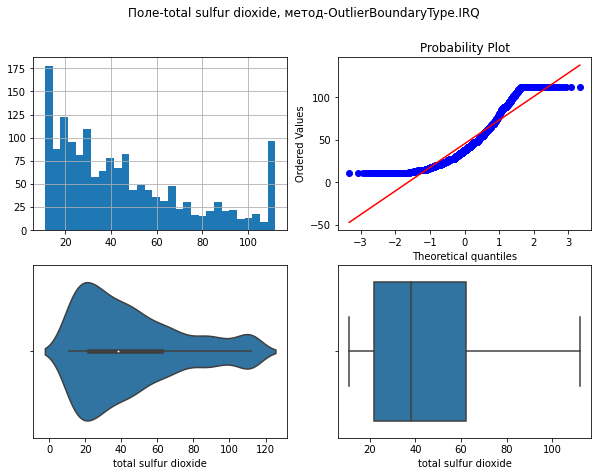

In [17]:
for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(dataset_1, 'total sulfur dioxide', obt)
        # Изменение данных
        dataset_1['total sulfur dioxide'] = np.where(dataset_1['total sulfur dioxide'] > upper_boundary, upper_boundary, 
                                 np.where(dataset_1['total sulfur dioxide'] < lower_boundary, lower_boundary, dataset_1['total sulfur dioxide']))
        title = 'Поле-{}, метод-{}'.format('total sulfur dioxide', obt)
        diagnostic_plots(dataset_1, 'total sulfur dioxide', title)

## 3.3 Обработка по крайней мере одного нестандартного признака

In [18]:
import datetime

Импорт нового набора данных

In [19]:
dataset_2=pd.read_csv('tesla_stocks.csv')
dataset_2.info()
dataset_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2959 non-null   object 
 1   Open       2959 non-null   float64
 2   High       2959 non-null   float64
 3   Low        2959 non-null   float64
 4   Close      2959 non-null   float64
 5   Adj Close  2959 non-null   float64
 6   Volume     2959 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.9+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [24]:
dataset_2['Date'] = dataset_2.apply(lambda x: pd.to_datetime(x['Date'], format='%Y-%m-%d'), axis=1)

In [25]:
# День
dataset_2['day'] = dataset_2['Date'].dt.day
# Месяц
dataset_2['month'] = dataset_2['Date'].dt.month
# Год
dataset_2['year'] = dataset_2['Date'].dt.year
#Неделя года
dataset_2['week'] = dataset_2['Date'].dt.isocalendar().week
#День недели 
dataset_2['dayofweek'] = dataset_2['Date'].dt.dayofweek
#Выходной день
dataset_2['day_name'] = dataset_2['Date'].dt.day_name()
dataset_2['is_holiday'] = dataset_2.apply(lambda x: 1 if x['Date'].dayofweek in [5,6] else 0, axis=1)

In [26]:
dataset_2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,week,dayofweek,day_name,is_holiday
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,29,6,2010,26,1,Tuesday,0
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,30,6,2010,26,2,Wednesday,0
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,1,7,2010,26,3,Thursday,0
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2,7,2010,26,4,Friday,0
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,6,7,2010,27,1,Tuesday,0


Разрыв во времени до настоящего времени

In [27]:
dataset_2['now'] = datetime.datetime.today()
dataset_2['diff'] = dataset_2['now'] - dataset_2['Date']
dataset_2.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj Close             float64
Volume                  int64
day                     int64
month                   int64
year                    int64
week                   UInt32
dayofweek               int64
day_name               object
is_holiday              int64
now            datetime64[ns]
diff          timedelta64[ns]
dtype: object

In [28]:
dataset_2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,week,dayofweek,day_name,is_holiday,now,diff
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,29,6,2010,26,1,Tuesday,0,2022-03-30 18:51:42.795367,4292 days 18:51:42.795367
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,30,6,2010,26,2,Wednesday,0,2022-03-30 18:51:42.795367,4291 days 18:51:42.795367
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,1,7,2010,26,3,Thursday,0,2022-03-30 18:51:42.795367,4290 days 18:51:42.795367
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2,7,2010,26,4,Friday,0,2022-03-30 18:51:42.795367,4289 days 18:51:42.795367
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,6,7,2010,27,1,Tuesday,0,2022-03-30 18:51:42.795367,4285 days 18:51:42.795367


## 3.4 Отбор признаков

### Отбор признаков из группы методов фильтрации (Методы, основанные на статистических характеристиках (univariate feature selection))

In [29]:
X_filter=dataset_1.drop(labels=['quality'],axis=1)
y_filter=dataset_1.quality

In [30]:
X_filter.shape

(1599, 11)

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

Text(0, 0.5, 'Взаимная информация')

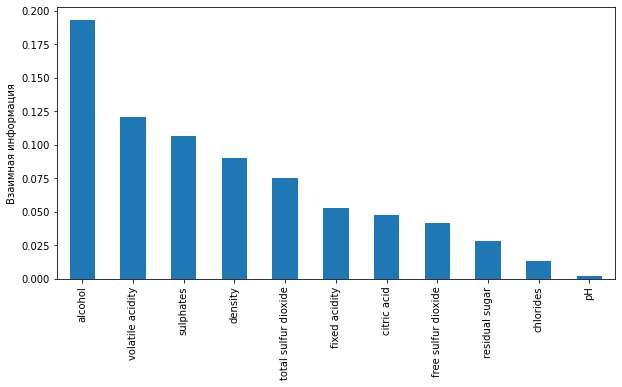

In [32]:
mi = mutual_info_classif(X_filter,y_filter)
mi = pd.Series(mi)
mi.index = X_filter.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [33]:
selector=SelectKBest(mutual_info_classif,k=5)
selector.fit(X_filter,y_filter)
X_filter_selected=selector.transform(X_filter)
X_filter_selected.shape

(1599, 5)

In [34]:
selector.get_support(indices=False)

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [35]:
X_filter.columns[selector.get_support()]

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')

### Отбор признаков из группы методов обертывания (алгоритм полного перебора)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
knn = KNeighborsClassifier(n_neighbors=3)
X_wrapper=dataset_1.drop(labels=['quality'],axis=1)
y_wrapper=dataset_1.quality
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_wrapper, y_wrapper, custom_feature_names=X_wrapper.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 550/550

Best accuracy score: 0.52
Best subset (indices): (0, 1, 9, 10)
Best subset (corresponding names): ('fixed acidity', 'volatile acidity', 'sulphates', 'alcohol')


### Отбор признаков из группы методов вложения (Линейный классификатор на основе SVM)

In [37]:
from sklearn.svm import LinearSVC
X_embedded=dataset_1.drop(labels=['quality'],axis=1)
y_embedded=dataset_1.quality
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(X_embedded, y_embedded)
# Коэффициенты регрессии
e_lr2.coef_

array([[-0.00571903,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.00369213,  0.        ,  0.        ,  0.        ,
        -0.08291761],
       [-0.03039241,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.00239792, -0.00130274,  0.        ,  0.        ,  0.        ,
        -0.05674778],
       [ 0.01109392,  0.00466757,  0.        ,  0.        ,  0.        ,
        -0.01276005,  0.01128122,  0.        ,  0.52267171,  0.        ,
        -0.22007031],
       [-0.00813936,  0.        ,  0.        , -0.00569309,  0.        ,
         0.0120655 , -0.00774636,  0.        ,  0.        ,  0.        ,
         0.0046047 ],
       [-0.00280453,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00363175, -0.00452041,  0.        , -0.50507709,  0.        ,
         0.10512136],
       [-0.03803028,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.00275739,  0.        ,  0.        ,  0.        ,
        -0.055

In [38]:
from sklearn.feature_selection import SelectFromModel
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(X_embedded, y_embedded)
sel_e_lr2.get_support()
X_embedded.columns[sel_e_lr2.get_support()]

Index(['fixed acidity', 'volatile acidity', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'alcohol'],
      dtype='object')